# Car Crashes Dataset from Seaborn package
This notebook will visualize the car crash data set and show how seaborn practice datasets can be used with Altair. This particular notebook is based on the "car_crashes" dataset found on the seaborn github page: https://github.com/mwaskom/seaborn-data/blob/master/car_crashes.csv

The code in this notebook is based on the Altair Example gallery (https://altair-viz.github.io/gallery/index.html) charts with slight modifications to further customize the charts and adaptations to the data being visualized here.

In [1]:
import altair as alt
import seaborn as sns

# Run this once per session, enables Altair rendering
alt.renderers.enable("notebook")

# Load data from seaborn sample datasets
df = sns.load_dataset("car_crashes")

# Preview data format
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


As there is not much information accompanying this data, some assumptions must be made about the meaning of the figures. An example on the seaborn tutorials (https://seaborn.pydata.org/examples/horizontal_barplot.html) suggests that the total and alcohol fields represent the no. of collisions per billion miles driven in the respective state, noted in the abbrev field. From this information, it could be assumed that the not_distracted, no_previous and speeding fields are in the same format given that their values are in a similar range. As this data concerns the US, the ins_premium and ins_losses could be assumed to be in dollars and the average figure for the given state.

#### Visualizing the effect of speeding on the total no. of collisons

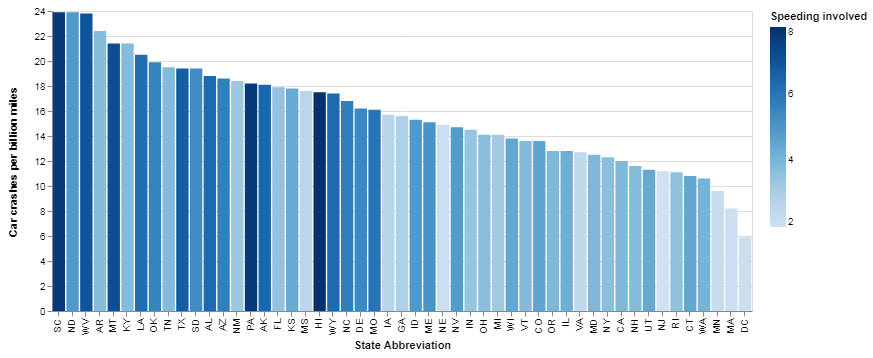

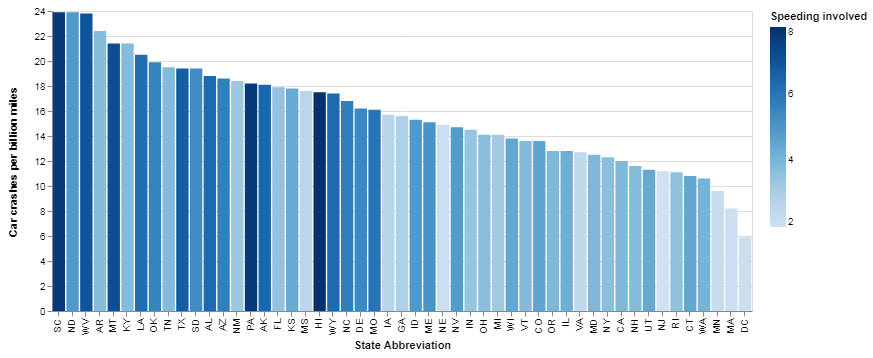

In [2]:
alt.Chart(df).mark_bar().encode(
    alt.X("abbrev:N", axis = alt.Axis(title = "State Abbreviation"), 
          sort = alt.SortField(field="total", op="sum", order='descending') # This line sorts the bars in descending order
    ),
    alt.Y("total:Q", axis = alt.Axis(title = "Car crashes per billion miles")),
    alt.Color("speeding:Q", legend=alt.Legend(title="Speeding involved"))
).properties(
    width = 700
)    

A general trend in the bar chart appears to be that states where there is more speeding involved in collisions, there are more collisions over all and conversely states where there is less speeding involved in collisions, there are less collisions overall. The right half of the chart appears to not have very dark bars whereas the left half of the chart appears to have more of the darker bars. The left half of the chart however has a fair share of lighter bars as well. This indicates that even though the is not as much speeding involved in collisions per billion miles driven, there are still a fair portion of collisions overall. These observations are made assuming the "speeding" field represents the no. of collisions involving speeding per billion miles driven and "total" represents the total no. of collisions per billion miles driven.

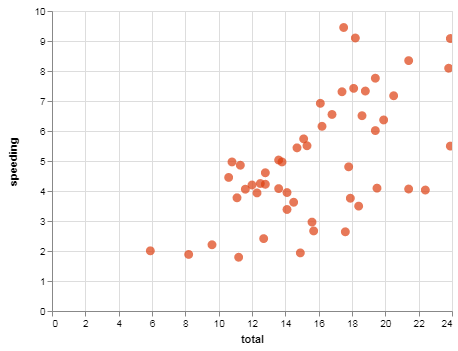

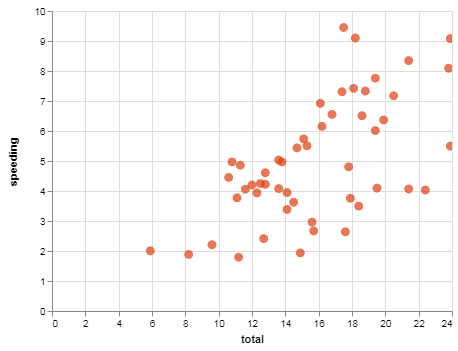

In [3]:
alt.Chart(df).mark_circle(size=80).encode(
    alt.X("total:Q"),
    alt.Y("speeding:Q"),
    alt.Tooltip(field="abbrev", type="nominal")
).configure_mark(
    color="#DE3F10"
).interactive()

The scatterplot appears to roughly confirm this trend, there seems to be a approximate linear relationship with the total no. of collisions per billion miles driven and the no. of collisions per billion miles where speeding was involved.

#### Visualizing collisions with alcohol involved

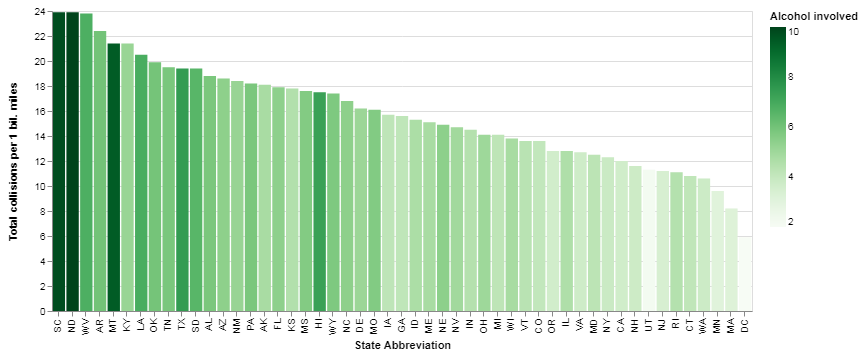

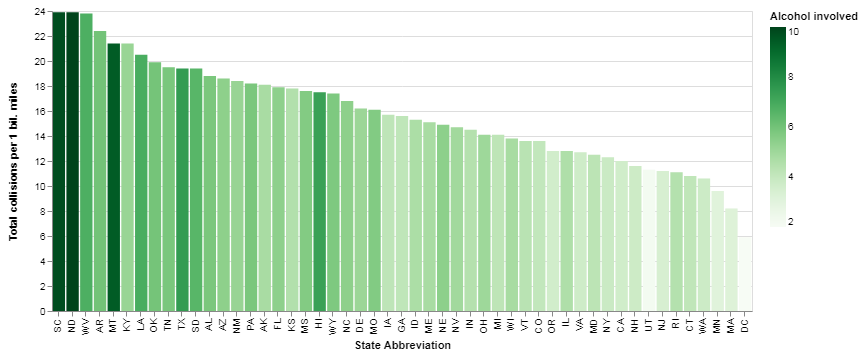

In [4]:
alt.Chart(df).mark_bar().encode(
    alt.X("abbrev:N", axis = alt.Axis(title = "State Abbreviation"), 
          sort = alt.SortField(field="total", op="sum", order='descending')
    ),
    alt.Y("total:Q", axis = alt.Axis(title = "Total collisions per 1 bil. miles")),
    alt.Color("alcohol:Q", legend=alt.Legend(title="Alcohol involved"), scale=alt.Scale(scheme='greens'))
).properties(
    width = 700
) 

This chart also appears to have a general trend. As the total number of collisions increases, so does the number of collisions involving alcohol.

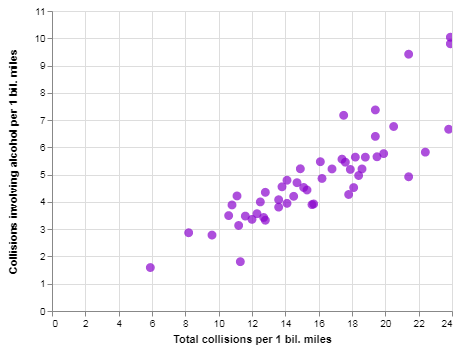

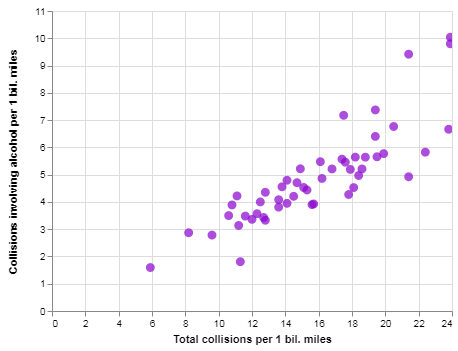

In [5]:
alt.Chart(df).mark_circle(size=80).encode(
    alt.X("total:Q", axis=alt.Axis(title="Total collisions per 1 bil. miles")),
    alt.Y("alcohol:Q", axis=alt.Axis(title="Collisions involving alcohol per 1 bil. miles")),
    alt.Tooltip(field="abbrev", type="nominal", title="State")
).configure_mark(
    color="#8A04CD"
).interactive()

#### Visualizing insurance premium and loss figures

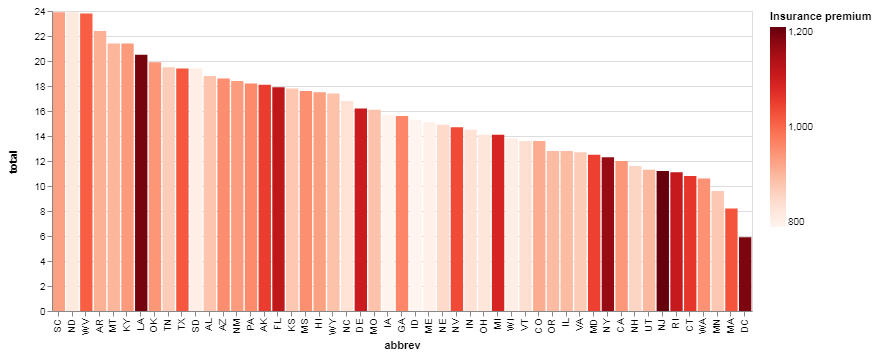

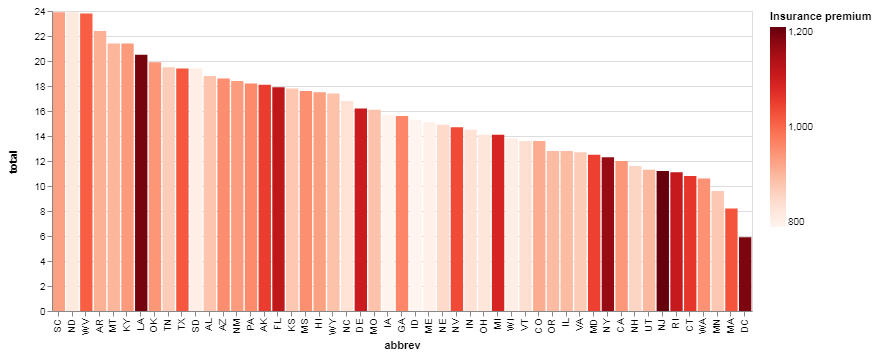

In [6]:
alt.Chart(df).mark_bar().encode(
    alt.X("abbrev:N", sort=alt.SortField(field="total", op="sum", order="descending")),
    alt.Y("total:Q"),
    alt.Color("ins_premium:Q", legend=alt.Legend(title="Insurance premium"), scale=alt.Scale(scheme='reds'))
).properties(
    width=700
)

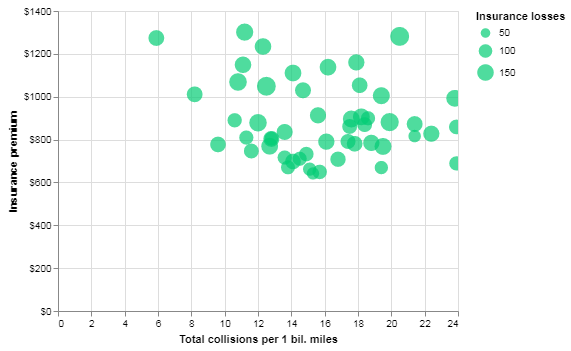

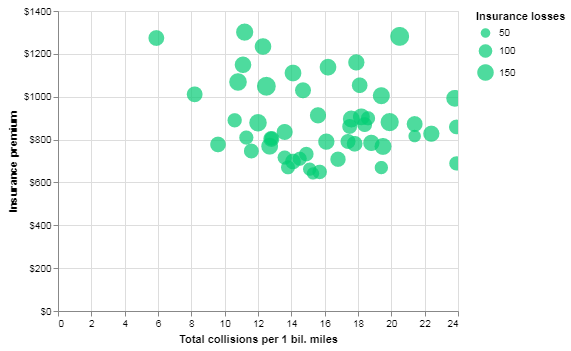

In [31]:
alt.Chart(df).mark_circle().encode(
    alt.X("total:Q", axis = alt.Axis(title="Total collisions per 1 bil. miles")),
    alt.Y("ins_premium:Q", axis = alt.Axis(format = "$f", title="Insurance premium")),
    alt.Size("ins_losses:Q", legend=alt.Legend(title="Insurance losses")),
    alt.Tooltip("abbrev", type="nominal")
).configure_mark(
    color="#04CD75"
).interactive()

Based on the bar chart and the scatterplot, there does not appear to be any relationship between the no. of collisions in a state and the insurance premium of that state.

#### Visualizing total no. of collisions per billion miles across the United States
In this visualization a modified car crashes dataset will be used. To map the states to the map provided in the vega datasets library (us_10m), each state must be given an "id" value corresponding to the appropriate ones in the map data. This has been done by adding the id to the car_crashes.csv file accompanying the notebooks.

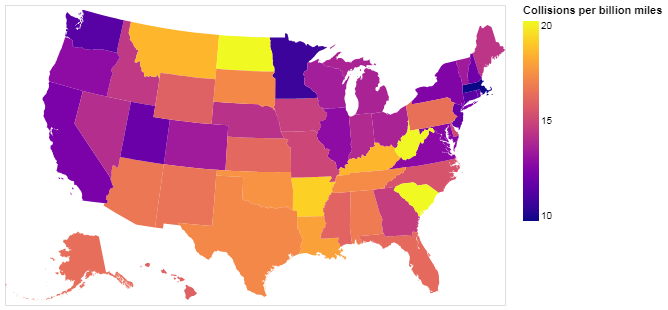

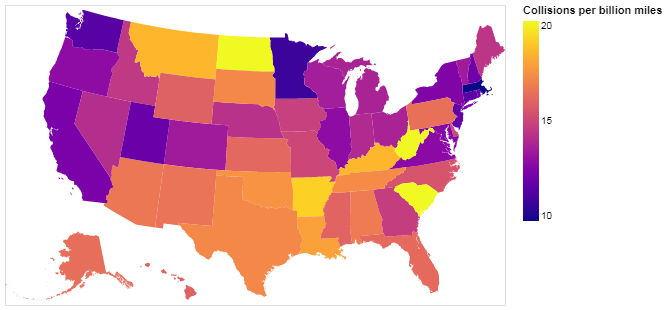

In [18]:
import pandas
from vega_datasets import data

# Define new dataset, modified car_crashes dataset with state ID's added
df2 = pandas.read_csv("car_crashes.csv")

# Defining the map to be used from the vega_datasets
states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(states).mark_geoshape().encode(
    alt.Color('total:Q', legend=alt.Legend(title="Collisions per billion miles"), scale=alt.Scale(scheme='plasma'))
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df2, 'id', ['total'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

#### Repeated Choropleth for collisions unvolving speeding and alcohol across the United States

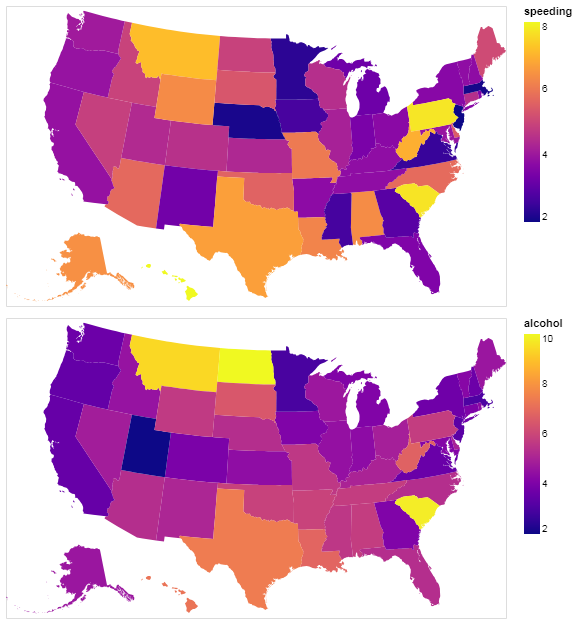

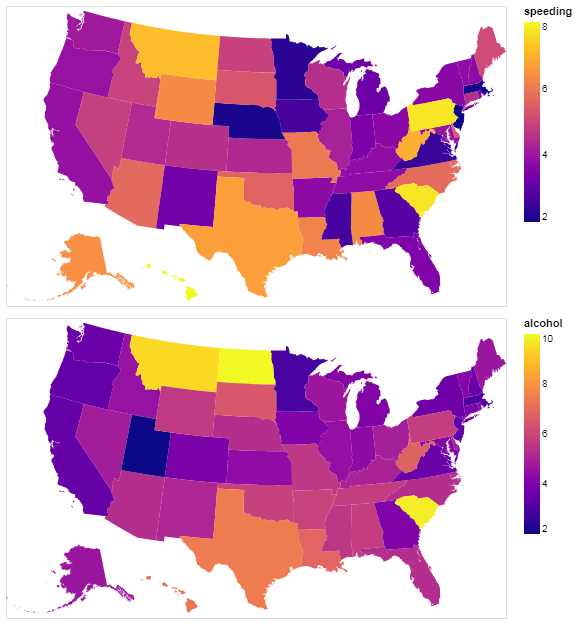

In [24]:
variable_list = ['speeding', 'alcohol']

alt.Chart(states).mark_geoshape().encode(
    alt.Color(alt.repeat('row'), type='quantitative', scale=alt.Scale(scheme='plasma'))
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df2, 'id', variable_list)
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
).repeat(
    row=variable_list
).resolve_scale(
    color='independent'
)

#### Visualizing insurance premiums across the United States

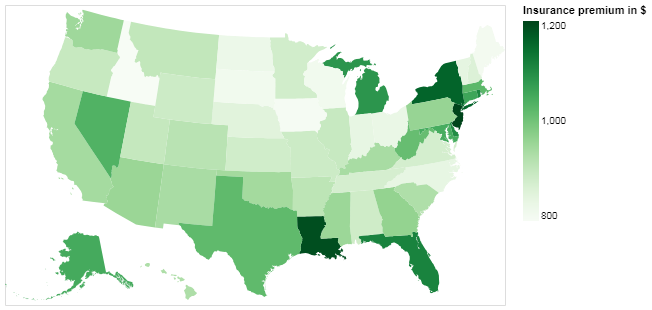

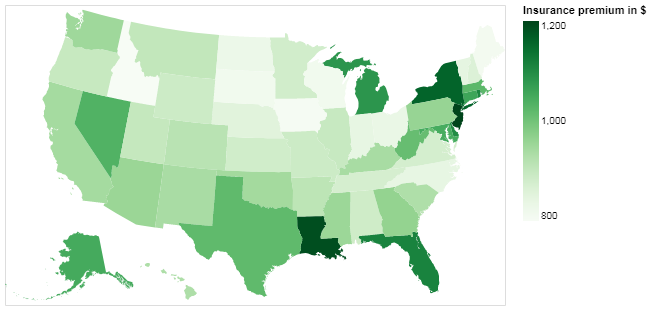

In [29]:
alt.Chart(states).mark_geoshape().encode(
    alt.Color('ins_premium:Q', legend=alt.Legend(title="Insurance premium in $"), scale=alt.Scale(scheme='greens'))
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df2, 'id', ['ins_premium'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)